The Nobel Prize has been among the most prestigious international awards since 1901. Each year, awards are bestowed in chemistry, literature, physics, physiology or medicine, economics, and peace. In addition to the honor, prestige, and substantial prize money, the recipient also gets a gold medal with an image of Alfred Nobel (1833 - 1896), who established the prize.

![](Nobel_Prize.png)

The Nobel Foundation has made a dataset available of all prize winners from the outset of the awards from 1901 to 2023. The dataset used in this project is from the Nobel Prize API and is available in the `nobel.csv` file in the `data` folder.

In this project, you'll get a chance to explore and answer several questions related to this prizewinning data. And we encourage you then to explore further questions that you're interested in!

In [363]:
# Loading in required libraries
import pandas as pd
import seaborn as sns
import numpy as np

# Start coding here!
import matplotlib.pyplot as plt

## Load the dataset

In [364]:
data = pd.read_csv('./data/nobel.csv')
data.head()

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France


In [365]:
data.shape

(1000, 18)

## 1. What is the most commonly awarded gender and birth country?

- Commonly awarded gender:

In [366]:
top_gender = data["sex"].value_counts().index[0]
top_gender

'Male'

- Commonly awarde birth country

In [367]:
top_country = data["birth_country"].value_counts().index[0]
top_country

'United States of America'

## 2. Which decade had the highest ratio of US-born Nobel Prize winners to total winners in all categories?

In [368]:
# Create the US-born winners column
data["us_born"] = data["birth_country"] == "United States of America"

# Create the decade column
data["decade"] = (np.floor(data["year"] / 10) * 10).astype(int)

# Finding the ratio
ratio = data.groupby("decade", as_index=False)["us_born"].mean()

# Identify the decade with the highest ratio of US-born winners
max_decade_usa = int(ratio["decade"][ratio["us_born"] == ratio["us_born"].max()].values[0])

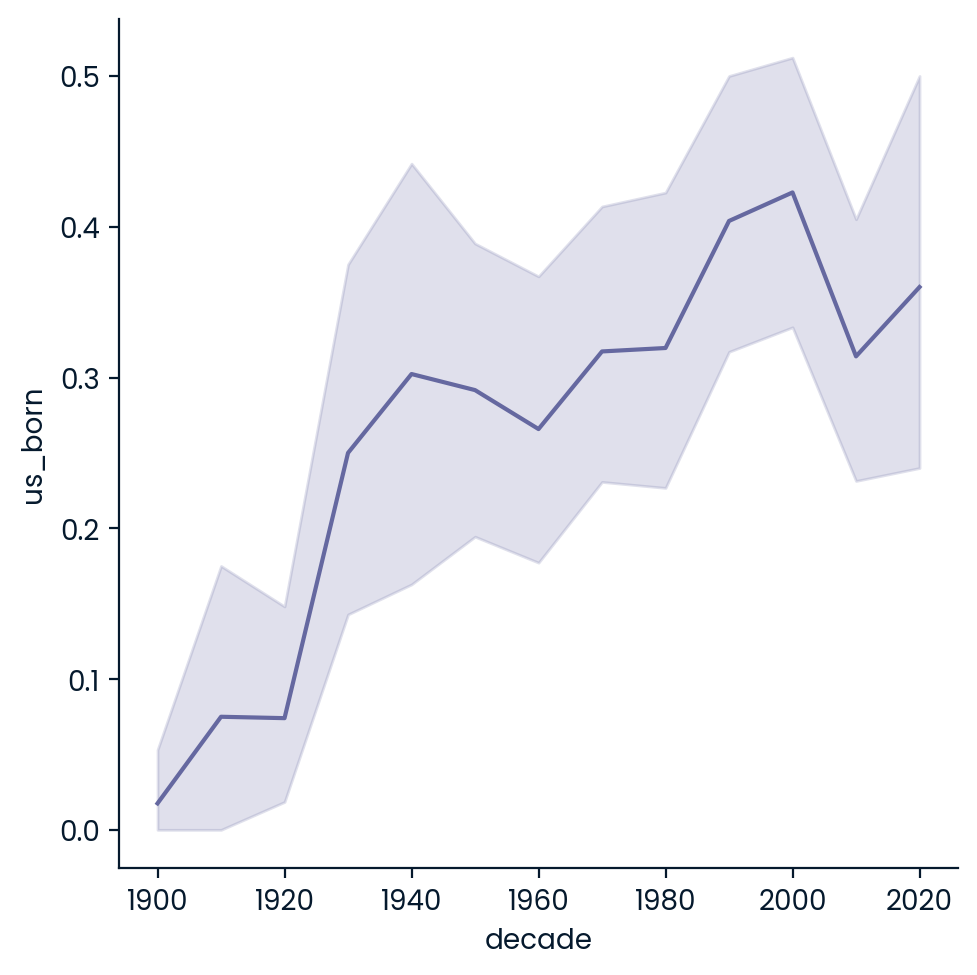

In [369]:
sns.relplot(x="decade", y="us_born", data=data, kind="line")
plt.show()

## 3. Which decade and Nobel Prize category combination had the highest proportion of female laureates?

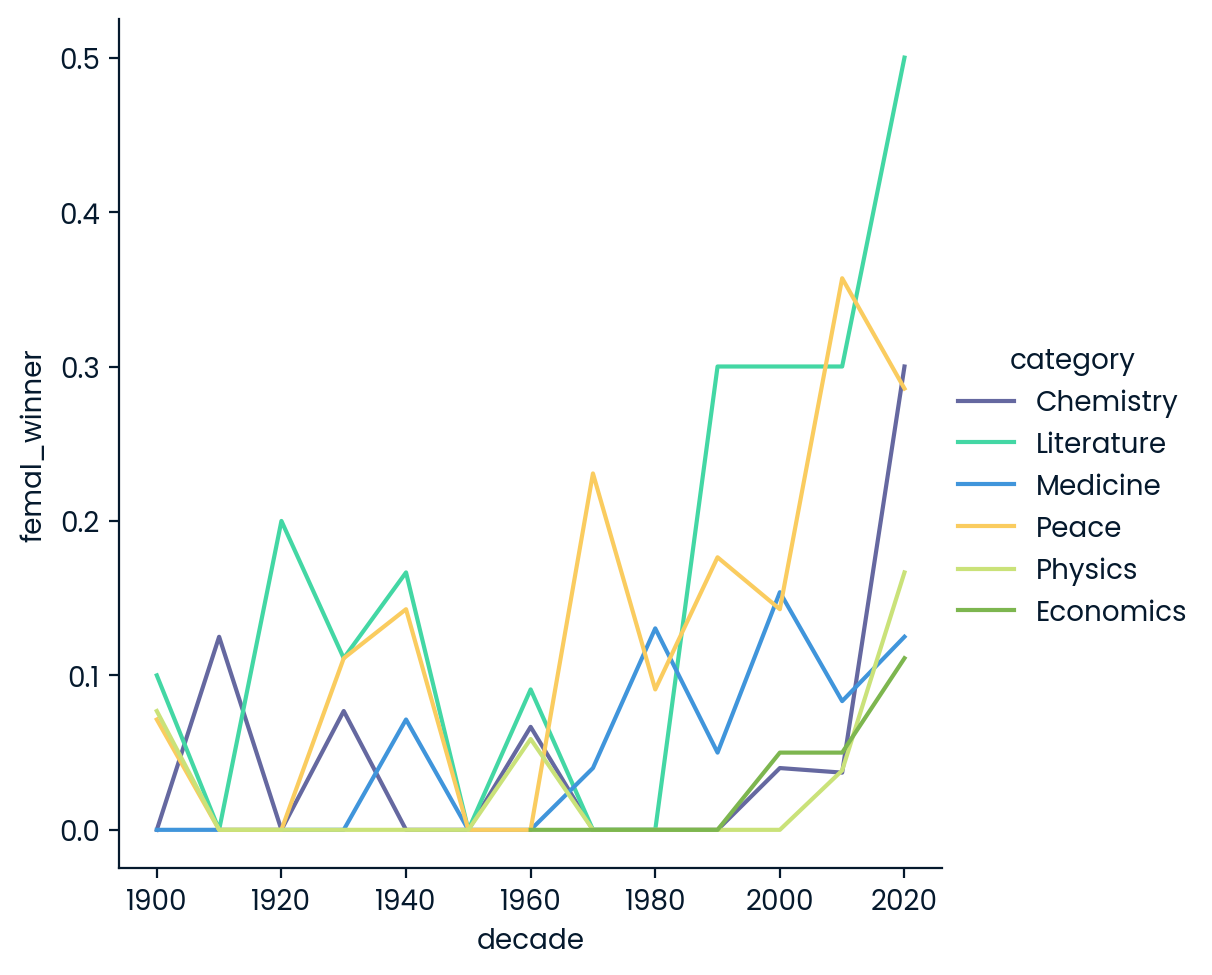

In [370]:
# Filtering for female winners
data["femal_winner"] = data["sex"] == "Female"

# Group by two columns
femal_laureates = data.groupby(["decade", "category"], as_index=False)["femal_winner"].mean()

# Find the decade and category with the highest female winners
highest_decade_category = femal_laureates[femal_laureates["femal_winner"] == femal_laureates["femal_winner"].max()]

# Create a dictionary
max_female_dict = {highest_decade_category["decade"].values[0]: highest_decade_category["category"].values[0]}

# Create a relational line plot with multiple categories
sns.relplot(x="decade", y="femal_winner", data=femal_laureates, kind="line", hue="category")
plt.show()

## 4. Who was the first woman to receive a Nobel Prize, and in what category?

In [371]:
# Filter a DataFrame
femal_winners = data[data["femal_winner"]]

# Find the minimum value in a column
first_woman = femal_winners[femal_winners["year"] == femal_winners["year"].min()]

first_woman_name = first_woman["full_name"].values[0] # .split(",")[0]
first_woman_category = first_woman["category"].values[0]
# print(f"First woman name: {first_woman_name}, category: {first_woman_category}")
first_woman_name

'Marie Curie, née Sklodowska'

## 5. Which individuals or organizations have won more than one Nobel Prize throughout the years?

In [372]:
full_names_counts = data["full_name"].value_counts()
repeat_list = list(full_names_counts.index[full_names_counts.values > 1])